<a href="https://colab.research.google.com/github/jukamt/project_ai/blob/main/FASHIONmnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as td
import matplotlib.pyplot as plt
from keras.backend import conv2d
from keras.layers.core.dropout import Dropout
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000,)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000,)


In [3]:
#chuẩn hoá dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000, 100)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000, 100)


In [4]:
#tạo mô hình CNN
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same',))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same',))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [5]:
#complie model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), verbose=1, callbacks=[EarlyStopping(monitor='val_loss',patience=80)])

Epoch 1/100
469/469 [==============================] - 18s 13ms/step - loss: 0.6194 - accuracy: 0.7881 - val_loss: 0.3756 - val_accuracy: 0.8631
Epoch 2/100
469/469 [==============================] - 6s 13ms/step - loss: 0.3172 - accuracy: 0.8840 - val_loss: 0.3182 - val_accuracy: 0.8805
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2673 - accuracy: 0.9028 - val_loss: 0.2907 - val_accuracy: 0.8941
Epoch 4/100
469/469 [==============================] - 6s 13ms/step - loss: 0.2338 - accuracy: 0.9142 - val_loss: 0.2610 - val_accuracy: 0.9072
Epoch 5/100
469/469 [==============================] - 8s 16ms/step - loss: 0.2065 - accuracy: 0.9244 - val_loss: 0.2566 - val_accuracy: 0.9076
Epoch 6/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1860 - accuracy: 0.9311 - val_loss: 0.2432 - val_accuracy: 0.9110
Epoch 7/100
469/469 [==============================] - 6s 13ms/step - loss: 0.1661 - accuracy: 0.9386 - val_loss: 0.2561 - val_accuracy

In [6]:
model.save('fashion_mnis_CNN.h5')

Sai số kiểm tra là:  0.8083686232566833
Độ chính xác kiểm tra là:  0.9236000180244446


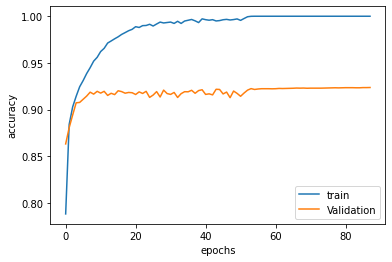

In [7]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()